### Clustering

Jay Urbain, PhD


1 - Review clustering and K-Means

2 - Review clusting with scikit-learn and the iris dataset.

3 - K-Mean clustering the adult dataset.

### Clustering###

You are given a data set where each observed example has a set of features, but has no labels. Labels are an essential for a supervised learning algorithm like *Logistic Regression*, which learns a model (hypothesis function) to predict labels given features. So what can we do to better understand the data?

One of the most straightforward tasks we can perform on a dataset is to find groups of data which are similar to one another -- what we call clusters.

*K-Means* is one of the most popular "clustering" algorithms. K-means stores *k* centroids that it uses to define clusters. A point (instance) is assigned to a particular cluster if it is *closer* to that cluster's centroid than any other cluster centroid.

K-Means finds the best centroids by alternating between:

1) assigning data points to clusters based on the current cluster centroids (cluster parameters)

2) chosing centroids (points which are the center of a cluster) based on the current assignment of data points to clusters.

<img src="kmeansViz.png">

*Figure 1: K-means algorithm. Training examples are shown as dots, and cluster centroids are shown as crosses. (a) Original dataset. (b) Random initial cluster centroids. (c-f) Illustration of running two iterations of k-means. In each iteration, we assign each training example to the closest cluster centroid (shown by "painting" the training examples the same color as the cluster centroid to which is assigned); then we move each cluster centroid to the mean of the points assigned to it. Images courtesy of Michael Jordan.*

### Clustering with scikit-learn

[http://scikit-learn.org/stable/tutorial/statistical_inference/unsupervised_learning.html#](http://scikit-learn.org/stable/tutorial/statistical_inference/unsupervised_learning.html#)

The [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) used below consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray .
The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.



In [51]:
from sklearn import cluster, datasets
# plots within notebook versus launching a separate window
%matplotlib inline 

iris = datasets.load_iris()
X_iris = iris.data
print (X_iris[1:10,])
print (type(X_iris))
print (X_iris.shape)

y_iris = iris.target
print (type(y_iris))
print (y_iris.shape)
#print type(y_iris)

k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X_iris) 
print('k_means labels:', k_means.labels_[1:10,])
print('y_iris data:', y_iris[1:10,])


[[4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
<class 'numpy.ndarray'>
(150, 4)
<class 'numpy.ndarray'>
(150,)
k_means labels: [0 0 0 0 0 0 0 0 0]
y_iris data: [0 0 0 0 0 0 0 0 0]


The plots below display what a *K-means* algorithm would yield using three clusters. It is then shown what the effect of a bad initialization is on the classification process: By setting *n_init* to only 1 (default is 10), the amount of times that the algorithm will be run with different centroid seeds is reduced. The next plot displays what using eight clusters would deliver, and finally the ground truth.

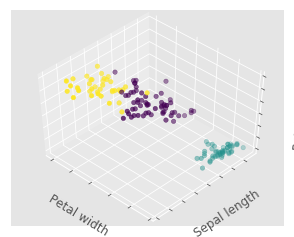

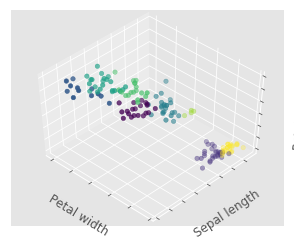

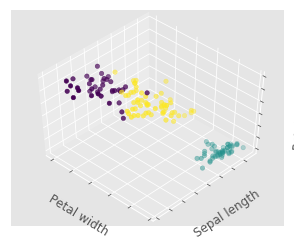

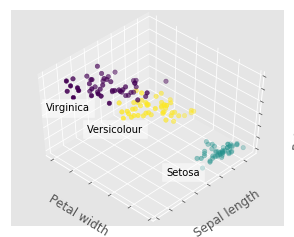

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = {'k_means_iris_3': KMeans(n_clusters=3),
              'k_means_iris_8': KMeans(n_clusters=8),
              'k_means_iris_bad_init': KMeans(n_clusters=3, n_init=1,
                                              init='random')}

fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()

### Clustering the Adult Dataset

The adult dataset is an example of a complex real world data set. In this dataset, the aim is to estimate if someone earns more than $50,000 per year. The dataset attributes describe a person, their environment, their background, and their life status.

*Attribute Information*

- \>50K, <=50K. 
- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, - Without-pay, Never-worked. 
- fnlwgt: continuous. 
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-- spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous. 
- capital-loss: continuous. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



### 1) Download and examine the adult data set

To download the dataset, navigate to [http://archive.ics.uci.edu/ml/datasets/Adult](http://archive.ics.uci.edu/ml/datasets/Adult), click on the *Data Folder* link, 
and download the *adult.data* and *adult.names* files into a *data* subdirectory to your IPython notebook. You can also read a description of the dataset.

The adult dataset can be used for classifiction, but we are going to see what we can discover about relationships in the data using clustering.

In [53]:
# Download

import os
import pandas as pd
adult_filename= "data/adult.data"

adult = pd.read_csv(adult_filename, header=None,
    names=["Age", "Work-Class","fnlwgt", 
    "Education", "Education-Num",
    "Martial-Status", "Occupation",
    "Relationship", "Race", "Sex",
    "Capital-gain", "Captial-loss",
    "Hours-per-week", "Natie-Country",
    "Earnings-Raw"])

In [54]:
# Examine the data 
# Note: there are many attributes, so you may need to scroll right

adult.head(n=20)

,Age,Work-Class,fnlwgt,Education,Education-Num,Martial-Status,Occupation,Relationship,Race,Sex,Capital-gain,Captial-loss,Hours-per-week,Natie-Country,Earnings-Raw
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Data files can contain extra blank lines at the end of the file. By default, *pandas* will interpret the penultimate new line to be an empty (but valid) row. To remove this, remvove any row with invalid numbers. The *inplace* parameter just makes the change in the give Dataframe, rather than create a new Dataframe.

In [55]:
print (adult.shape)
adult.dropna(how='all', inplace=True)
print (adult.shape)

(32561, 15)
(32561, 15)


### 2)  Examining the attributes

Pandas dataframes provide useful functions for describing a dataset. 

You can access each column as shown below. There are several functions you can run on each column to better understand the type and distribution of each attribute. Some functions may not make sense, e.g., mean of Marital-Status.

[http://pandas.pydata.org/pandas-docs/version/0.17.0/api.html](http://pandas.pydata.org/pandas-docs/version/0.17.0/api.html)

a) Add additional notebook cells below to examine *each* column in the dataset. 

b) For each column, identify the data type as numeric, ordinal, or categorical. 

I've provided some examples. In each case, you want to examine some of the rows in the dataset. You can use the dataframe head() function. For numeric attributes consider using the pandas dataframe describe() and matplotlib histogram plot functions. For categorical and ordinal attributes you can generate a crosstab table and a matplotlib barplot. *Note: You can use crosstab for comparing different attributes that share the same categories.* To compare numberic attributes, you can use a scatter plot. Many options here. Experiment!


In [56]:
adult.columns

Index(['Age', 'Work-Class', 'fnlwgt', 'Education', 'Education-Num',
       'Martial-Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital-gain', 'Captial-loss', 'Hours-per-week', 'Natie-Country',
       'Earnings-Raw'],
      dtype='object')

In [57]:
adult["Age"].describe()

count   32,561.000
mean        38.582
std         13.640
min         17.000
25%         28.000
50%         37.000
75%         48.000
max         90.000
Name: Age, dtype: float64

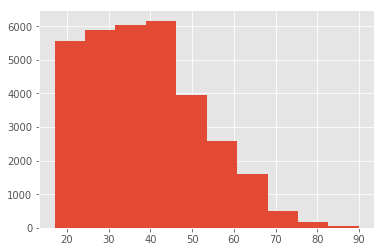

In [58]:
adult['Age'].hist(bins=10)

In [59]:
# unique categorical values
adult["Work-Class"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [60]:
# cross tab
result = adult[['Work-Class']].apply(pd.value_counts).fillna(0).T
result.index=['Work-Class']
result.columns=['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked']
pd.options.display.float_format = '{:,.0f}'.format

# cross tabulated result
result

,State-gov,Self-emp-not-inc,Private,Federal-gov,Local-gov,?,Self-emp-inc,Without-pay,Never-worked
Work-Class,22696,2541,2093,1836,1298,1116,960,14,7


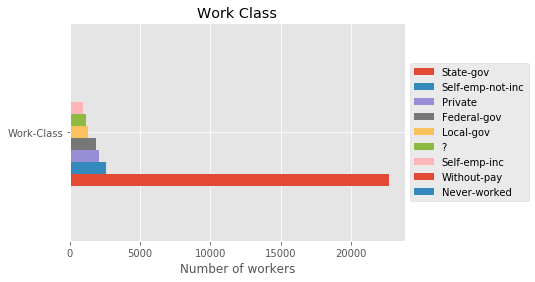

In [61]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

# horizontal bar plot
plt=result.plot.barh(title="Work Class")
plt.set_xlabel("Number of workers")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt

In [62]:
adult["Hours-per-week"].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

In [63]:
adult["fnlwgt"].describe()

count      32,561
mean      189,778
std       105,550
min        12,285
25%       117,827
50%       178,356
75%       237,051
max     1,484,705
Name: fnlwgt, dtype: float64

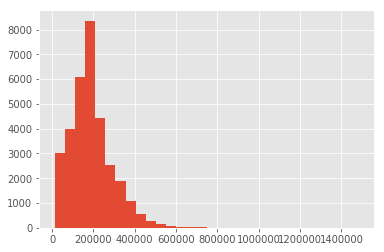

In [64]:
adult["fnlwgt"].hist(bins=30)

In [65]:
#Education
# cross tab
result = adult[['Education']].apply(pd.value_counts).fillna(0).T
result.index=['Education']
result.columns=['Bachelors', 'Some-college', '11th', 'HS-grad',
       'Prof-school', 'Assoc-acdm', 'Assoc-voc', '9th', '7th-8th', '12th', 'Masters', '1st-4th', '10th', 'Doctorate',
               '5th-6th', 'Preschool']
pd.options.display.float_format = '{:,.0f}'.format

# cross tabulated result
result

,Bachelors,Some-college,11th,HS-grad,Prof-school,Assoc-acdm,Assoc-voc,9th,7th-8th,12th,Masters,1st-4th,10th,Doctorate,5th-6th,Preschool
Education,10501,7291,5355,1723,1382,1175,1067,933,646,576,514,433,413,333,168,51


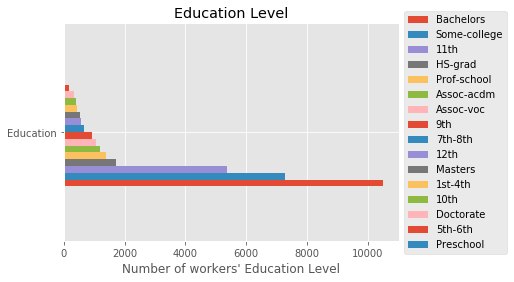

In [66]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

# horizontal bar plot
plt=result.plot.barh(title="Education Level")
plt.set_xlabel("Number of workers' Education Level")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt

In [67]:
#Education-Num
adult["Education-Num"].describe()

count   32,561
mean        10
std          3
min          1
25%          9
50%         10
75%         12
max         16
Name: Education-Num, dtype: float64

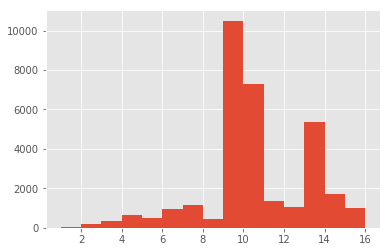

In [68]:
adult["Education-Num"].hist(bins=15)

In [69]:
#Martial-Status
# cross tab
result = adult[['Martial-Status']].apply(pd.value_counts).fillna(0).T
result.index=['Martial-Status']
result.columns=['Married-civ-spouse', 'Divorced', 'Never-married', 'Separated',
       'Widowed', 'Married-- spouse-absent', 'Married-AF-spouse']
pd.options.display.float_format = '{:,.0f}'.format

# cross tabulated result
result

,Married-civ-spouse,Divorced,Never-married,Separated,Widowed,Married-- spouse-absent,Married-AF-spouse
Martial-Status,14976,10683,4443,1025,993,418,23


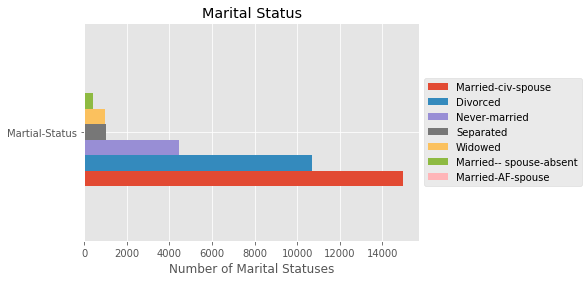

In [70]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

# horizontal bar plot
plt=result.plot.barh(title="Marital Status")
plt.set_xlabel("Number of Marital Statuses")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt

In [71]:
#Occupation
# cross tab
result = adult[['Occupation']].apply(pd.value_counts).fillna(0).T
result.index=['Occupation']
result.columns=['Tech-support', 'Craft-repair', 'Other-service', 'Sales',
       'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct',
        'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Priv-house-serv', 'Protective-serv', 'Armed-Forces', '?'];
pd.options.display.float_format = '{:,.0f}'.format

# cross tabulated result
result

,Tech-support,Craft-repair,Other-service,Sales,Exec-managerial,Prof-specialty,Handlers-cleaners,Machine-op-inspct,Adm-clerical,Farming-fishing,Transport-moving,Priv-house-serv,Protective-serv,Armed-Forces,?
Occupation,4140,4099,4066,3770,3650,3295,2002,1843,1597,1370,994,928,649,149,9


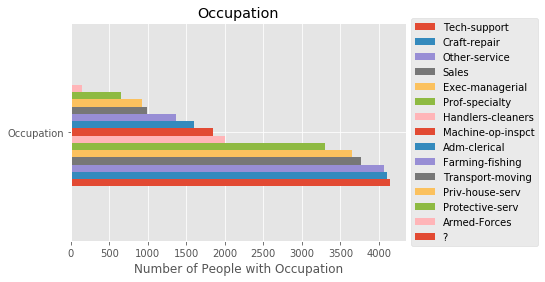

In [72]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

# horizontal bar plot
plt=result.plot.barh(title="Occupation")
plt.set_xlabel("Number of People with Occupation")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt

In [73]:
#Relationship
# cross tab
result = adult[['Relationship']].apply(pd.value_counts).fillna(0).T
result.index=['Relationship']
result.columns=['Wife', 'Own-child', 'Husband', 'Not-in-family',
       'Other-relative', 'Unmarried'];
pd.options.display.float_format = '{:,.0f}'.format

# cross tabulated result
result

,Wife,Own-child,Husband,Not-in-family,Other-relative,Unmarried
Relationship,13193,8305,5068,3446,1568,981


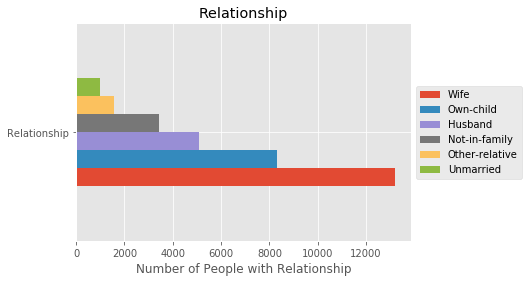

In [74]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

# horizontal bar plot
plt=result.plot.barh(title="Relationship")
plt.set_xlabel("Number of People with Relationship")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt

In [75]:
#Race
# cross tab
result = adult[['Race']].apply(pd.value_counts).fillna(0).T
result.index=['Race']
result.columns=['White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other',
       'Black'];
pd.options.display.float_format = '{:,.0f}'.format

# cross tabulated result
result

,White,Asian-Pac-Islander,Amer-Indian-Eskimo,Other,Black
Race,27816,3124,1039,311,271


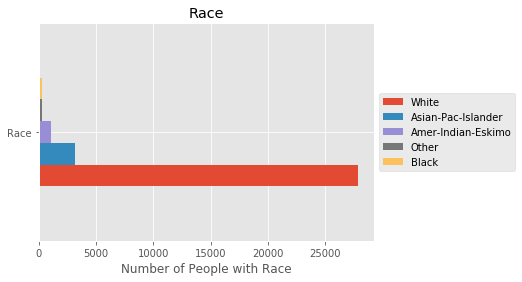

In [76]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

# horizontal bar plot
plt=result.plot.barh(title="Race")
plt.set_xlabel("Number of People with Race")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt

In [77]:
#sex: Female, Male.
# cross tab
result = adult[['Sex']].apply(pd.value_counts).fillna(0).T
result.index=['Sex']
result.columns=['Female', 'Male'];
pd.options.display.float_format = '{:,.0f}'.format

# cross tabulated result
result

,Female,Male
Sex,21790,10771


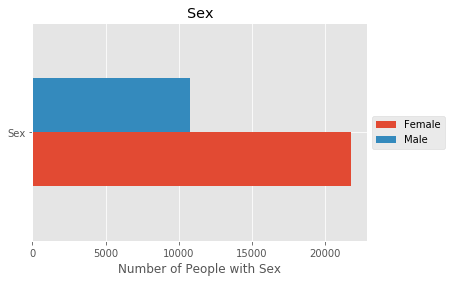

In [78]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

# horizontal bar plot
plt=result.plot.barh(title="Sex")
plt.set_xlabel("Number of People with Sex")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt

In [79]:
#Capital-gain: continuous.
adult["Capital-gain"].describe()

count   32,561
mean     1,078
std      7,385
min          0
25%          0
50%          0
75%          0
max     99,999
Name: Capital-gain, dtype: float64

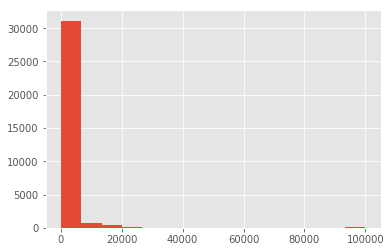

In [80]:
adult["Capital-gain"].hist(bins=15)

In [81]:
#capital-loss: continuous
adult["Captial-loss"].describe()

count   32,561
mean        87
std        403
min          0
25%          0
50%          0
75%          0
max      4,356
Name: Captial-loss, dtype: float64

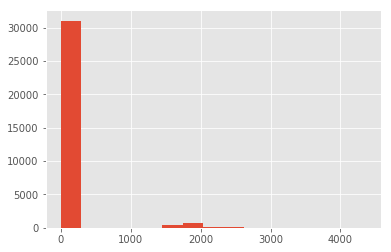

In [82]:
adult["Captial-loss"].hist(bins=15)

In [83]:
#Hours-per-week: continuous.
adult["Hours-per-week"].describe()

count   32,561
mean        40
std         12
min          1
25%         40
50%         40
75%         45
max         99
Name: Hours-per-week, dtype: float64

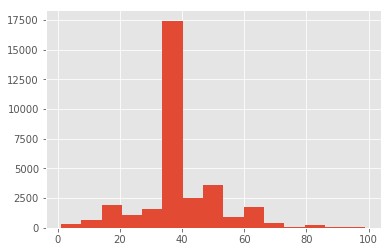

In [84]:
adult["Hours-per-week"].hist(bins=15)

In [85]:
#native-country
# cross tab
result = adult[["Natie-Country"]].apply(pd.value_counts).fillna(0).T
result.index=["Natie-Country"]
result.columns=['United-States', 'Cambodia', 'England', 'Puerto-Rico', 'Canada', 'Germany', 'Outlying-US(Guam-USVI-etc)',
               'India', 'Japan', 'Greece', 'South', 'China', 'Cuba', 'Iran', 'Honduras', 'Philippines', 'Italy', 'Poland',
               'Jamaica', 'Vietnam', 'Mexico', 'Portugal', 'Ireland', 'France', 'Dominican-Republic', 'Laos', 'Ecuador',
               'Taiwan', 'Haiti', 'Columbia', 'Hungary', 'Guatemala', 'Nicaragua', 'Scotland', 'Thailand', 'Yugoslavia',
               'El-Salvador', 'Trinadad&Tobago', 'Peru', 'Hong', 'Holand-Netherlands', '?'];
pd.options.display.float_format = '{:,.0f}'.format

# cross tabulated result
result

,United-States,Cambodia,England,Puerto-Rico,Canada,Germany,Outlying-US(Guam-USVI-etc),India,Japan,Greece,...,Nicaragua,Scotland,Thailand,Yugoslavia,El-Salvador,Trinadad&Tobago,Peru,Hong,Holand-Netherlands,?
Natie-Country,29170,643,583,198,137,121,114,106,100,95,...,19,19,18,18,16,14,13,13,12,1


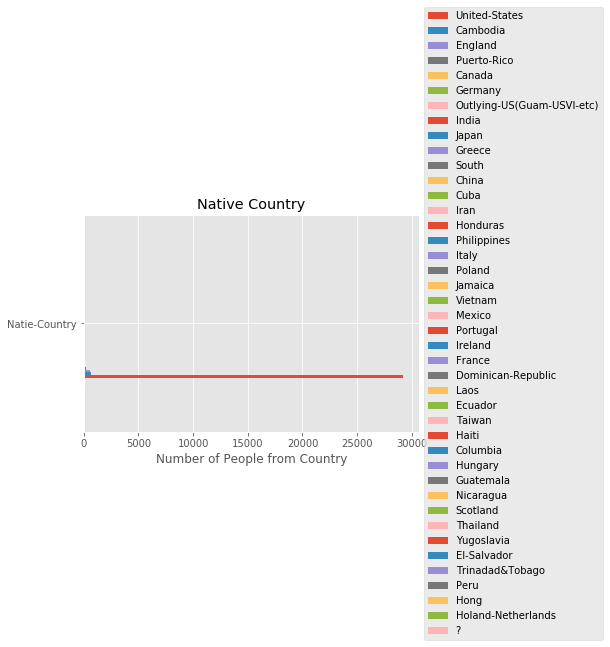

In [86]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

# horizontal bar plot
plt=result.plot.barh(title="Native Country")
plt.set_xlabel("Number of People from Country")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt

In [87]:
#"Earnings-Raw"
# cross tab
result = adult[["Earnings-Raw"]].apply(pd.value_counts).fillna(0).T
result.index=["Earnings-Raw"]
result.columns=[' <=50k', ' >50k'];
pd.options.display.float_format = '{:,.0f}'.format

# cross tabulated result
result

,<=50k,>50k
Earnings-Raw,24720,7841


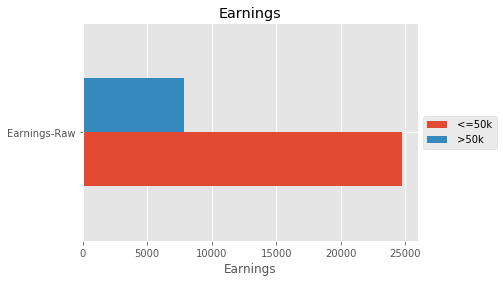

In [88]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

# horizontal bar plot
plt=result.plot.barh(title="Earnings")
plt.set_xlabel("Earnings")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt

### 2) Feature selection and normalization

From your analysis in (1) above, select at least 6 distinct attributes in addition to income for clustering. By distinct, I’m refering to non-redundant, i.e., non-correlated, feature attributes. For example, don’t select both forms of education. 

Select features you think may have a strong (positive or negative) association with higher income, and select features of multile types, e.g., continuous, discrete, ordinal, and categorical. You may select more, and you may want to change your feature selection as you experiment.

Feel free to use additional tools we learned as part of our data analysis work.

You also may want to not select columns with many missing values.

Enter your attribute selections in the cell below.

# your work here
1. Age - Older people tend to make more money
2. Work Class - private sector tends to make more money than public sector jobs
3. Education-Num  - the higher the education level, the higher the income typically
4. Hours-per-week - As people work more, it would seem like they would make more money
5. Race - Although it should not be this way, race often has a factor in income
6. Sex - Although it should not, women are often paid less than men for the same job

7. Earnings-raw

** Feature normalization**

For each of your selected features, identify a strategy to normalize your data between 0 and 1.

- Numerical attributes, e.g., income, are normalized to values between 0 and 1 using min-max normalization. 
- Ordinal attributes, i.e., education, are normalized to a range of 0 to 1. 
- Boolean attributes are set to either 0 or 1.
- Categorical attributes are assigned an integer enumerated type, e.g., 1, 2, 3, ... and return 1 if there is a match, 0 otherwise.

Define your strategy and normalize each of your features in the cell(s) below. This is arguably the most important step in the lab.

# your work here

* Age is a numerical value, so all ages must be normalized between a value of 0 and 1. This can be done using min-max normalization


* Work class is categorical, so the strings must be enumerated. Since this data is not binary, it makes sense to encode this data using one-hot encoding to make data numeric.


* Education-Number is numeric data, and as a result, it should be normalized to a value between 0 and 1. This can be done using the min-max normalization method.

* Hours per week is a numerical value and as a result, it should be encoded between a value of zero and one using a normalization method such as min-max normalization.


* Race is categorical data which is more complex than binary data. As a result, the race data should be normalized using a one-hot encoding method.


* Sex is categorical data, and additionally, it is binary. As a result, the labelencoding normalization method would be a good fit for this data attribute.


* Earnings are categorical, with a binary distribution. As a result, the labelencoding method can be used to normalize the attribute.


** Missing values **

Examine the dataset, and your selected features for missing values. You will need to come up with a strategy for dealing with missing values for each of your selected attributes. 

Strategies:

- Replace mssing values with the most likely value, e.g., mode for categorical or boolean, mean for continuous, etc. This can be risky, since you distort the relationships in the data.
- Encode missing values that will work within a *distance* function. Sometimes, the fact that the feature *is* missing has meaning.
- Just delete the row containing the missing value. As long as you do not throw away too much data, this can be the best strategy.

Define your missing value strategy in the cell(s) below and correct missing values..

### Age

In [89]:
adult["Age"].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

Based on the values shown above, there don't appear to be any missing values in the adult age data. As a result, it will not be necessary to filter out or replace any data with missing values.

### Work Class

In [90]:
adult["Work-Class"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [91]:
adult[adult["Work-Class"] == " ?"]["Work-Class"].count()

1836

As demonstrated, there are 1836 rows where where Work-Class is classified as "?". In this case, the people likley don't know which cateogory their job is classified as. While this may seem worthless at first, this may actually be valuable data. Not knowing what your job is classified as might correlate to how much you care about your job, or how smart you are. As a result, these values will be converted to "Unknown".

In [92]:
adult.loc[adult["Work-Class"] == " ?", "Work-Class"] = "Unknown"
adult["Work-Class"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', 'Unknown', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

### Education

In [93]:
adult["Education-Num"].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

As can be seen above, there are no missing values for education number, so it will not be necessary to replace any missing values.

### Hours per Week

In [94]:
print(adult["Hours-per-week"].unique())
adult["Hours-per-week"].isnull().values.any()

[40 13 16 45 50 80 30 35 60 20 52 44 15 25 38 43 55 48 58 32 70  2 22 56
 41 28 36 24 46 42 12 65  1 10 34 75 98 33 54  8  6 64 19 18 72  5  9 47
 37 21 26 14  4 59  7 99 53 39 62 57 78 90 66 11 49 84  3 17 68 27 85 31
 51 77 63 23 87 88 73 89 97 94 29 96 67 82 86 91 81 76 92 61 74 95]


False

As can be seen above, there are no missing values in the number of hours per week, so it will not be necessary to fill in any missing values.

### Race

In [95]:
print(adult["Race"].unique())
adult["Race"].isnull().values.any()

[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']


False

As can be seen above, there are no entries in the data set where race is missing or defined as an odd value. As a result, no missing values will need to be handled.

### Sex

In [96]:
print(adult["Sex"].unique())
adult["Sex"].isnull().values.any()

[' Male' ' Female']


False

As demonstrated above, there are no entries with a missing sex, and as a result, missing values don't need to be handled.

### Earnings

In [97]:
print(adult["Earnings-Raw"].unique())
adult["Earnings-Raw"].isnull().values.any()

[' <=50K' ' >50K']


False

Similar to many of the other attributes, there are no missing values for Earnings.

### 3) Creating a cluster dataset

Using your selected attributes and the income attribute, create a new *clustering* dataframe where each attriubte is normalized and where you've dealth with missing values.

In [98]:
#Handle man-max encoding for numerical data
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()

# Scaling down both train and test data set - returns ndarray
adult_numeric_data=adult[['Age', 'Hours-per-week','Education-Num']].copy()

adult_numeric_data[['Age', 'Hours-per-week', 'Education-Num']] = min_max.fit_transform(adult[
    ['Age', 'Hours-per-week', 'Education-Num']].astype('float64'))

pd.options.display.float_format = '{:,.3f}'.format
adult_numeric_data.head()

,Age,Hours-per-week,Education-Num
0,0.301,0.398,0.800
1,0.452,0.122,0.800
2,0.288,0.398,0.533
3,0.493,0.398,0.400
4,0.151,0.398,0.800


The rest of the data attributes that were chosen are cateogorical attributes, and as a result, one-hot encoding will be used to encode the values to a normalized value.

In [99]:
# Importing LabelEncoder and initializing it
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for column in adult.columns:
    if adult[column].dtype == type(object):
        le = LabelEncoder()
        adult[column] = le.fit_transform(adult[column])

In [100]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(sparse=False)
adult_data=adult.copy()

# adult_data["Work-Class"]=adult_data["Work-Class"].astype('category')
# adult_data["Race"]=adult_data["Race"].astype('category')
# adult_data["Sex"]=adult_data["Sex"].astype('category')
# adult_data["Earnings-Raw"]=adult_data["Earnings-Raw"].astype('category')

columns=['Work-Class', 'Race']

for col in columns:
    
       # creating an exhaustive list of all possible categorical values
        data=adult_data[[col]].append(adult_data[[col]])
        enc.fit(data)
       
       # Fitting One Hot Encoding on train data
        temp = enc.transform(adult_data[[col]])
    
       # Changing the encoded features into a data frame with new column names
        temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col]
            .value_counts().index])
    
       # In side by side concatenation index values should be same
       # Setting the index values similar to the X_train data frame
        temp=temp.set_index(adult_data.index.values)
        
       # adding the new One Hot Encoded varibales to the train data frame
        adult_data=pd.concat([adult_data,temp],axis=1)
        
       # fitting One Hot Encoding on test data
        temp = enc.transform(adult_data[[col]])
        
       # changing it into data frame and adding column names
        temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col]
            .value_counts().index])
        
       # Setting the index for proper concatenation
        temp=temp.set_index(adult_data.index.values)
        
       # adding the new One Hot Encoded varibales to test data frame
        adult_categorical_data=pd.concat([adult_data,temp],axis=1)

C:\Users\larsonma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\larsonma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warnin

In [101]:
adult_categorical_data.head()

,Age,Work-Class,fnlwgt,Education,Education-Num,Martial-Status,Occupation,Relationship,Race,Sex,...,Race_4,Race_2,Race_1,Race_0,Race_3,Race_4,Race_2,Race_1,Race_0,Race_3
0,39,6,77516,9,13,4,1,1,4,1,...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000
1,50,5,83311,9,13,2,4,0,4,1,...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000
2,38,3,215646,11,9,0,6,1,4,1,...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000
3,53,3,234721,1,7,2,6,0,2,1,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
4,28,3,338409,9,13,2,10,5,2,0,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000


** Validate your clustering dataframe**

This may be the most important step. Examine the records in your database, and run the appropriate statistical methods on each of your selected attribute columns to make sure everything is sane.

In [107]:
# your work here
pd.options.display.float_format = '{:,.3f}'.format

adult_categorical_data_normalized = adult_categorical_data.iloc[:,14:]

normalized_data = pd.concat([adult_numeric_data, adult_categorical_data_normalized, adult_categorical_data["Sex"]], axis=1, sort=False)
print(normalized_data.describe())
normalized_data.head()

             Age  Hours-per-week  Education-Num  Earnings-Raw  Work-Class_3  \
count 32,561.000      32,561.000     32,561.000    32,561.000    32,561.000   
mean       0.296           0.402          0.605         0.241         0.029   
std        0.187           0.126          0.172         0.428         0.169   
min        0.000           0.000          0.000         0.000         0.000   
25%        0.151           0.398          0.533         0.000         0.000   
50%        0.274           0.398          0.600         0.000         0.000   
75%        0.425           0.449          0.733         0.000         0.000   
max        1.000           1.000          1.000         1.000         1.000   

       Work-Class_5  Work-Class_1  Work-Class_8  Work-Class_6  Work-Class_4  \
count    32,561.000    32,561.000    32,561.000    32,561.000    32,561.000   
mean          0.064         0.000         0.697         0.034         0.078   
std           0.245         0.015         0.460    

,Age,Hours-per-week,Education-Num,Earnings-Raw,Work-Class_3,Work-Class_5,Work-Class_1,Work-Class_8,Work-Class_6,Work-Class_4,...,Race_2,Race_1,Race_0,Race_3,Race_4,Race_2,Race_1,Race_0,Race_3,Sex
0,0.301,0.398,0.800,0,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1
1,0.452,0.122,0.800,0,0.000,0.000,0.000,0.000,0.000,1.000,...,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1
2,0.288,0.398,0.533,0,0.000,0.000,0.000,1.000,0.000,0.000,...,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1
3,0.493,0.398,0.400,0,0.000,0.000,0.000,1.000,0.000,0.000,...,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1
4,0.151,0.398,0.800,0,0.000,0.000,0.000,1.000,0.000,0.000,...,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0


### 5) K-Means Clustering

1 - Use scikit-learn and implement the function *get_kmeans_score(data,K)*"

2 - Run your solution for 1 to 10 values of K. 

3 - Save SSE values for each trial in a list. To obtain a score related to the model fit:   
    `score = np.abs(model.score(data))`

4 - Plot your results in a scree plot similar to the following:

<img src="screeplot.png">

5 - Identify your optimal value for K.

In [103]:
def get_kmeans_score(data, K):
    '''
    returns the kmeans score regarding SSE for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        K - the number of centroids you want (the k value)
    OUTPUT:
        score - the SSE score for the kmeans model fit to the data
    '''
    
    # your work here
    from sklearn.cluster import KMeans
    import numpy as np
    
    kmeans = KMeans(n_clusters=K).fit(data)
    return np.abs(kmeans.score(data))

scores = []
for i in range (1,11):
    scores.append(get_kmeans_score(normalized_data, i))

print(scores)

[48879.74047448925, 36669.0385326482, 29588.46055770514, 25781.77832959049, 22595.208431082036, 19333.659988278916, 17267.805861165783, 15604.327149398923, 14104.882056508714, 13417.903080817134]


Text(0.5,1,'Elbow plot')

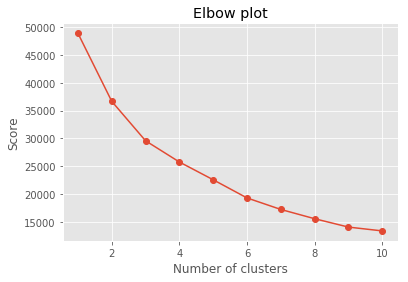

In [104]:
import matplotlib
import matplotlib.pyplot as plt

X = list(range(1,11))
plt.plot(X, scores, '-o')
plt.xlabel("Number of clusters")
plt.ylabel("Score")
plt.title("Elbow plot")

### 6) Clustering evaluation

Repeat step (5) above for k=2,3,4, and 5.

Tabulate your results for k=2,3,4,5, and 6 (your first trial).

Qualitatively which value of k provided the best clustering results?

What attributes are the most effective for generating clusters for income (without using the income attribute!)?



    Age  Education-Num  Sex
0 0.301          0.800    1
1 0.452          0.800    1
2 0.288          0.533    1
3 0.493          0.400    1
4 0.151          0.800    0
0    0
1    0
2    0
3    0
4    0
Name: Earnings-Raw, dtype: int32


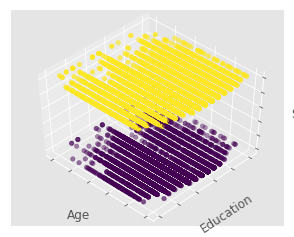

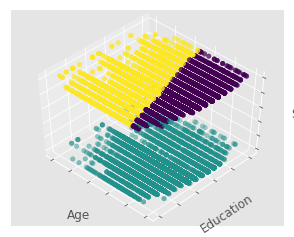

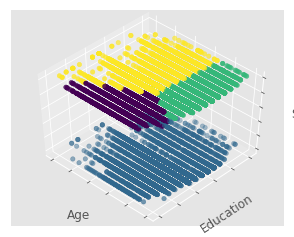

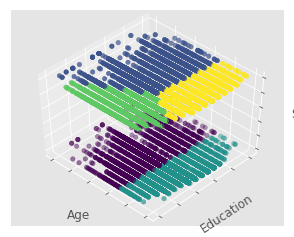

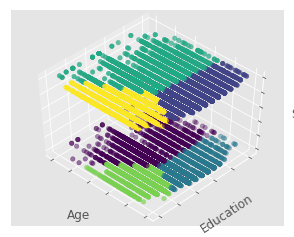

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
pd.options.display.float_format = '{:,.3f}'.format


from sklearn.cluster import KMeans

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
X = normalized_data[['Age', 'Education-Num', 'Sex']].copy()
y = normalized_data.loc[:,"Earnings-Raw"].copy()

print(X.head())
print(y.head())

estimators = {'k_means_2': KMeans(n_clusters=2),
              'k_means_3': KMeans(n_clusters=3),
              'k_means_4': KMeans(n_clusters=4),
              'k_means_5': KMeans(n_clusters=5),
              'k_means_6': KMeans(n_clusters=6)}

fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(X)
    labels = est.labels_

    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Age')
    ax.set_ylabel('Education')
    ax.set_zlabel('Sex')
    fignum = fignum + 1

# Plot the ground truth
# fig = plt.figure(fignum, figsize=(4, 3))
# plt.clf()
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# plt.cla()

# for name, label in [('<=50k', 0),
#                     ('>50k', 1),]:
#     ax.text3D(X[y == label, 3].mean(),
#               X[y == label, 0].mean() + 1.5,
#               X[y == label, 2].mean(), name,
#               horizontalalignment='center',
#               bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# # Reorder the labels to have colors matching the cluster results
# y = np.choose(y, [1, 2, 0]).astype(np.float)
# ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)

# ax.w_xaxis.set_ticklabels([])
# ax.w_yaxis.set_ticklabels([])
# ax.w_zaxis.set_ticklabels([])
# ax.set_xlabel('Age')
# ax.set_ylabel('Education')
# ax.set_zlabel('Sex')
# plt.show()

Based on the the clustering analysis befored above, using values of 2, 3, 4, 5, and 6, several noteable relationships can be seen. To begin, when k=2, the data is clusted into two groups, seperated on the z-axis. This is due to the fact that the category 'sex' is a binary attriubte, so data is simply being split based on whether the people are male or female - this does not provide much insight. As the number of clusters are increased though, clusters appear to form for males before they begin to form for females. What this means is that the amount that a person makes depends more on Age and Education levels for men, and less for womeon (i.e. - the glass ceiling). More can be interpreted from the clustering performed above however. 

It also appears that for people with a low education level, age doesn't have much of an impact on earnings. This is interpreted from the long, thin cluster that forms at the lowest education levels, and expands the entire age spectrum.

Additionally, there appears to be a binary difference between earnings that occur at higher education levels. This may infer that when educated people first enter the job market, they obtain entry level jobs which pay less than positions for those that are more experienced. Note however, this binary difference related to age does not exist for those with low amounts of education.

To reiterate, the behaviors just discussed appear to be stronger for men than they do for women. It appears that for the women, they may be hitting a glass ceiling, indicating that this may be an older data set that doesn't fully represent the current state of the job market.

### 7) Clustering using other methods

Apply hierarchical aglomerative clustering to the same data set. Experiment with 2 or 3 different linkages. For each case display the Cophenetic Correlation Coefficient, and generate a dendogram. See the [SciPy Hierarchical Clustering and Dendrograms](../../notebooks/SciPy%20Hierarchical%20Clustering%20and%20Dendrograms.ipynb) for tips.

### Could not run the code below due to time and memory requirements.

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

#Dropping columns because the algorithm can't properly handle the amount of data
normalized_data.drop(['Work-Class_0', 'Work-Class_1', 'Work-Class_2', 'Work-Class_3', 'Work-Class_4',
            'Work-Class_5', 'Work-Class_6', 'Work-Class_7', 'Work-Class_8', 'Race_0', 'Race_1',
            'Race_2', 'Race_3', 'Race_4'], axis=1, inplace=True)

# generate the linkage matrix
Z = linkage(normalized_data, 'ward')

from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(normalized_data))
print(c)

calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()